In [1]:
import sys
sys.path.append('../scripts')
from ChangePointDetector import ChangePointDetector

In [2]:
detector = ChangePointDetector()
detector.set_data('../data/Langevin_1D.txt')
detector.set_truth('../data/ChangePts.txt')
detector.compute_change_points()
detector.compute_f1_stats()
recall, precision, f1 = detector.get_f1_stats()
recall, precision, f1


(0.7929850746268656, 0.35597989949748743, 0.4913757225433526)

0it [00:00, ?it/s]

1it [05:25, 325.48s/it]

2it [10:31, 314.27s/it]

3it [15:45, 314.10s/it]

4it [20:21, 299.06s/it]

5it [24:52, 288.83s/it]

6it [29:02, 275.58s/it]

7it [33:20, 269.79s/it]

8it [37:34, 264.90s/it]

9it [1:29:37, 1158.39s/it]

10it [1:34:59, 899.98s/it]

10it [1:34:59, 569.90s/it]

<Axes: >

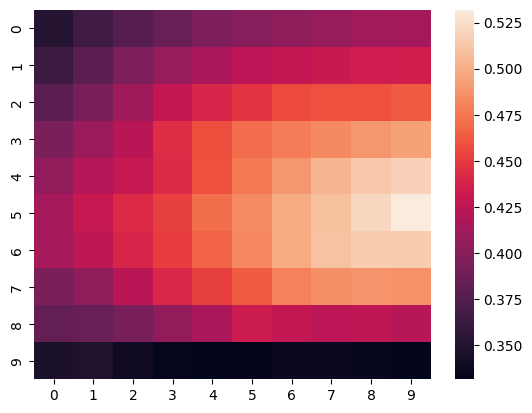

In [21]:
import numpy as np
import seaborn as sns
from tqdm import tqdm
quantile_floor = 78
quantile_ceiling = 98
quantile_step = 2
quantile_count = int((quantile_ceiling - quantile_floor) / quantile_step)
window_floor = 150
window_ceiling = 300
window_step = 15
window_count = int((window_ceiling - window_floor) / window_step)
recall_matrix = np.empty((window_count, quantile_count))
f1_matrix = np.empty((window_count, quantile_count))
method='wasserstein'

for i, q in tqdm(enumerate(range(quantile_floor, quantile_ceiling, quantile_step))):
    for j, w in enumerate(range(window_floor, window_ceiling, window_step)):
        detector.compute_change_points(method=method, windowsize=w, cutoff=(0.01 * q))
        detector.compute_f1_stats()
        recall_matrix[i,j] = detector.get_f1_stats()[0]
        f1_matrix[i,j] = detector.get_f1_stats()[2]



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '0.78'),
  Text(0, 1.5, '0.80'),
  Text(0, 2.5, '0.82'),
  Text(0, 3.5, '0.84'),
  Text(0, 4.5, '0.86'),
  Text(0, 5.5, '0.88'),
  Text(0, 6.5, '0.90'),
  Text(0, 7.5, '0.92'),
  Text(0, 8.5, '0.94'),
  Text(0, 9.5, '0.96')])

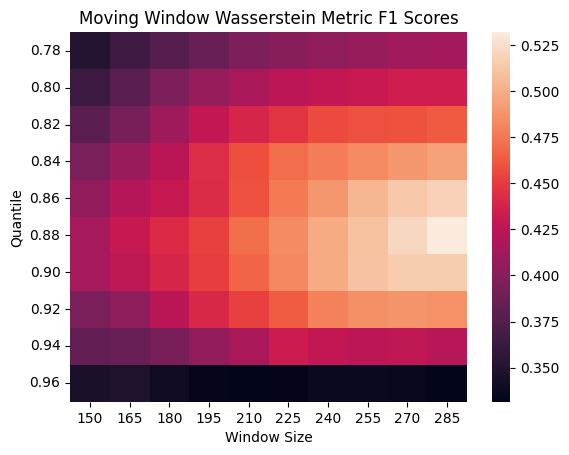

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Moving Window Wasserstein Metric F1 Scores")
sns.heatmap(f1_matrix)
ax.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax.set_ylabel("Quantile")
ax.set_xlabel("Window Size")
plt.yticks(rotation=0)